In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyber-security-attacks/README.md
/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv


# **1- Upload libraries**

In [5]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **2- Upload data and analyze**

In [6]:
df = pd.read_csv("/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv")

# We obtain general information about our dataset using pandas features. Number of columns, their names, variable types, number of non-empty values, etc.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [8]:
df.head()  #first five row

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [9]:
df.tail()  #last five row

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server
39999,2023-10-10 11:59:52,14.102.21.108,109.198.45.7,50137,55575,ICMP,1175,Control,HTTP,Eligendi omnis voluptate nihil voluptatibus do...,...,Logged,Medium,Zaina Kumar,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,Segment A,"Pudukkottai, West Bengal",112.169.115.139,Log Data,Alert Data,Firewall


In [10]:
df.columns  #all name of columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [11]:
df.describe()  #Returns the basic statistical summary of the numeric columns in a data frame.

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


# Returns the number of unique values ​​in each column.

In [12]:
def find_unique(column):
    return df[column].nunique()
for column in df.columns:
    unique_value_number = find_unique(column)
    print(f"{column} için benzersiz değer sayısı: {unique_value_number}")

Timestamp için benzersiz değer sayısı: 39997
Source IP Address için benzersiz değer sayısı: 40000
Destination IP Address için benzersiz değer sayısı: 40000
Source Port için benzersiz değer sayısı: 29761
Destination Port için benzersiz değer sayısı: 29895
Protocol için benzersiz değer sayısı: 3
Packet Length için benzersiz değer sayısı: 1437
Packet Type için benzersiz değer sayısı: 2
Traffic Type için benzersiz değer sayısı: 3
Payload Data için benzersiz değer sayısı: 40000
Malware Indicators için benzersiz değer sayısı: 1
Anomaly Scores için benzersiz değer sayısı: 9826
Alerts/Warnings için benzersiz değer sayısı: 1
Attack Type için benzersiz değer sayısı: 3
Attack Signature için benzersiz değer sayısı: 2
Action Taken için benzersiz değer sayısı: 3
Severity Level için benzersiz değer sayısı: 3
User Information için benzersiz değer sayısı: 32389
Device Information için benzersiz değer sayısı: 32104
Network Segment için benzersiz değer sayısı: 3
Geo-location Data için benzersiz değer say

# **3- Analyze of variable**

# Checks the conditions required to find variables that are categorical. Columns where variables appear numeric but the meaning of numeric values ​​is string values ​​are also defined as 'num_but_cat'. String values ​​that are not categories are also defined as 'cat_but_car'.

In [13]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

cat_cols = cat_cols + num_but_cat

cat_cols = [col for col in cat_cols if col not in cat_but_car]

df[cat_cols].nunique()

Protocol              3
Packet Type           2
Traffic Type          3
Malware Indicators    1
Alerts/Warnings       1
Attack Type           3
Attack Signature      2
Action Taken          3
Severity Level        3
Network Segment       3
Firewall Logs         1
IDS/IPS Alerts        1
Log Source            2
dtype: int64

# Numerical variables are analyzed.

In [14]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
num_cols = [col for col in num_cols if col not in cat_cols]

df[num_cols].nunique()

Source Port         29761
Destination Port    29895
Packet Length        1437
Anomaly Scores       9826
dtype: int64

# **4- Missing data analysis and filling**

In [15]:
df.isnull().sum()  #number of null values each column

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

# Since the columns with empty values ​​are categorical, the mode value is determined and the empty values ​​are filled with the most repeated values.

In [16]:
def fill_null_cat(dataframe, col_name):
    mod_value = df[col_name].mode()[0]
    df[col_name].fillna(mod_value, inplace=True)

for col in df.columns[df.isnull().any()].tolist():
    fill_null_cat(df, col)
df.isnull().sum()
    

/tmp/ipykernel_30/676112757.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name].fillna(mod_value, inplace=True)


Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

# **5- Data Visualization** 

# Statistical analyses are performed on the columns containing numerical variables and the numbers of the variables are grouped with a histogram.

count    40000.000000
mean     32970.356450
std      18560.425604
min       1027.000000
5%        4240.900000
10%       7505.000000
20%      13820.800000
30%      20031.000000
40%      26387.400000
50%      32856.000000
60%      39161.000000
70%      45717.400000
80%      52343.400000
90%      58833.100000
95%      62203.150000
99%      64889.020000
max      65530.000000
Name: Source Port, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


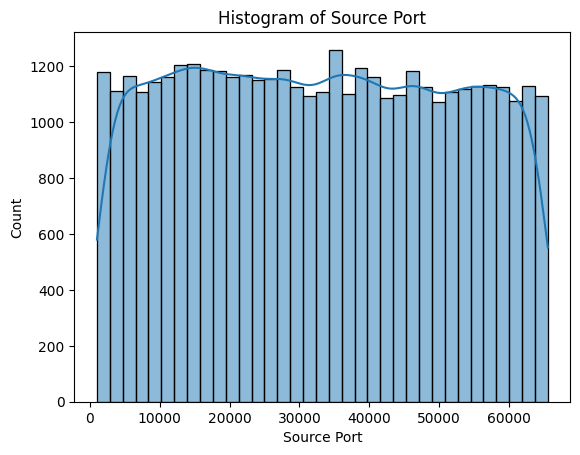

count    40000.000000
mean     33150.868650
std      18574.668842
min       1024.000000
5%        4317.950000
10%       7487.800000
20%      13933.800000
30%      20114.700000
40%      26622.800000
50%      33004.500000
60%      39636.400000
70%      46081.300000
80%      52438.000000
90%      58883.200000
95%      62161.200000
99%      64853.000000
max      65535.000000
Name: Destination Port, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


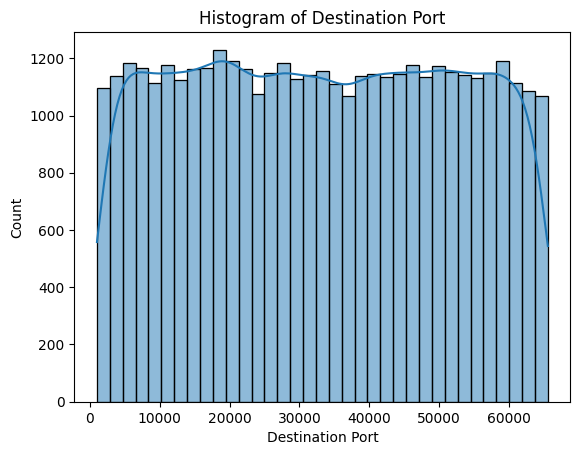

count    40000.000000
mean       781.452725
std        416.044192
min         64.000000
5%         132.000000
10%        205.000000
20%        349.000000
30%        493.000000
40%        635.000000
50%        782.000000
60%        926.000000
70%       1071.000000
80%       1216.000000
90%       1356.000000
95%       1427.000000
99%       1486.000000
max       1500.000000
Name: Packet Length, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


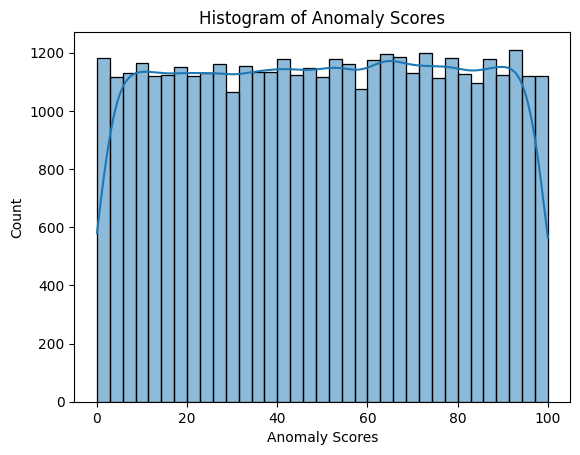

In [19]:
for col in num_cols:
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(df[col].describe(quantiles).T) 
    
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

# Columns with numerical variables were visualized with boxplot.

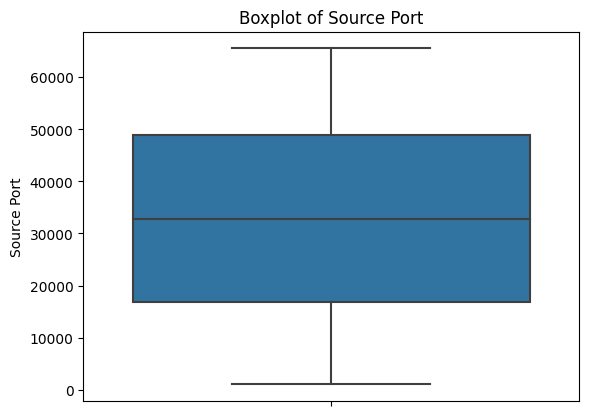

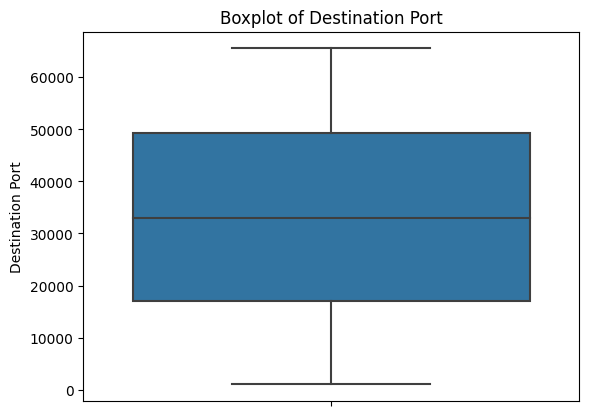

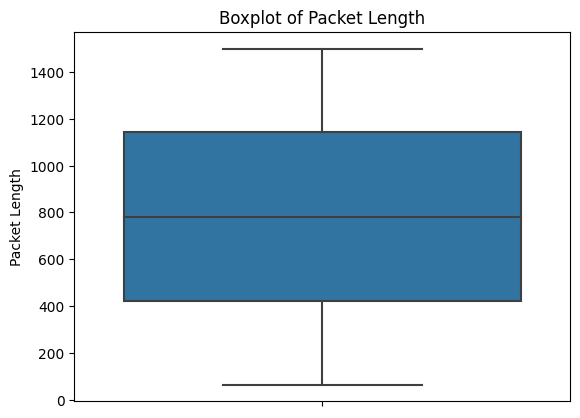

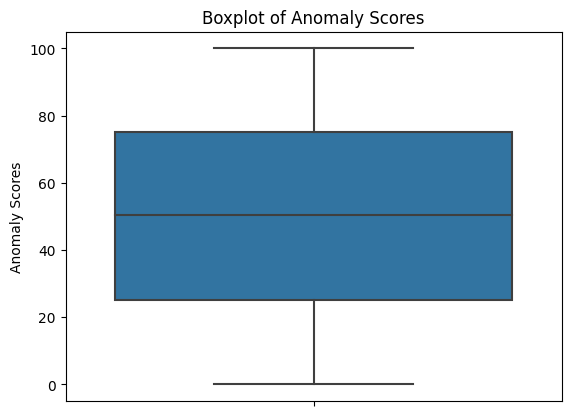

In [20]:
for col in num_cols:
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# Columns with categorical variables were visualized.

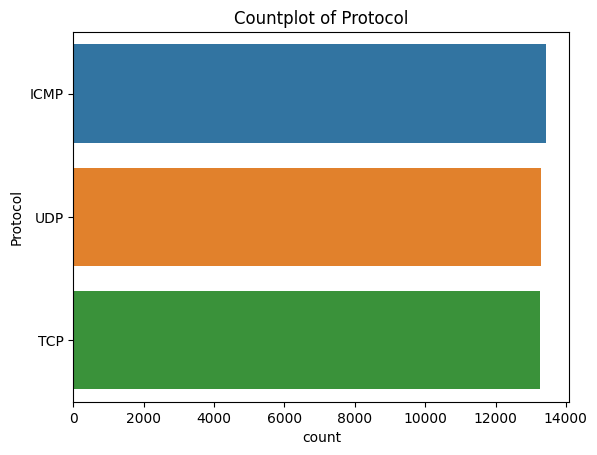

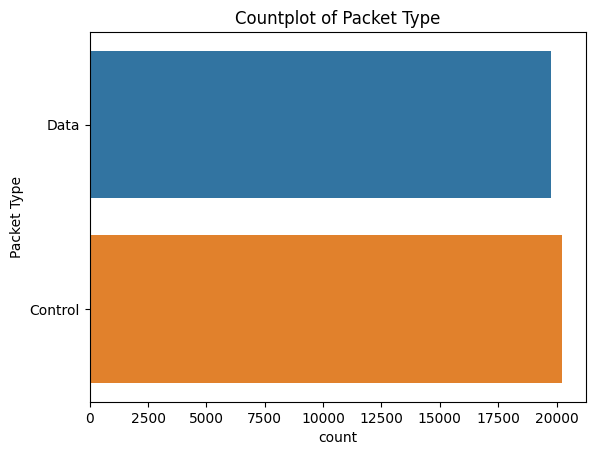

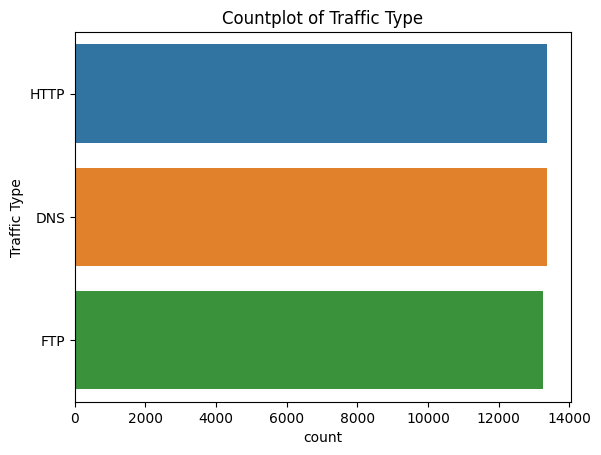

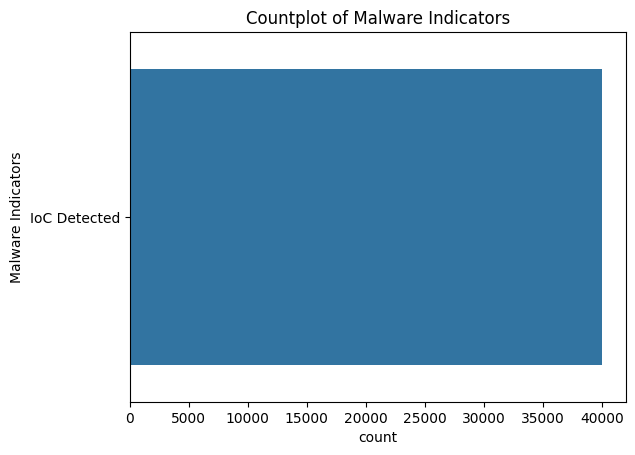

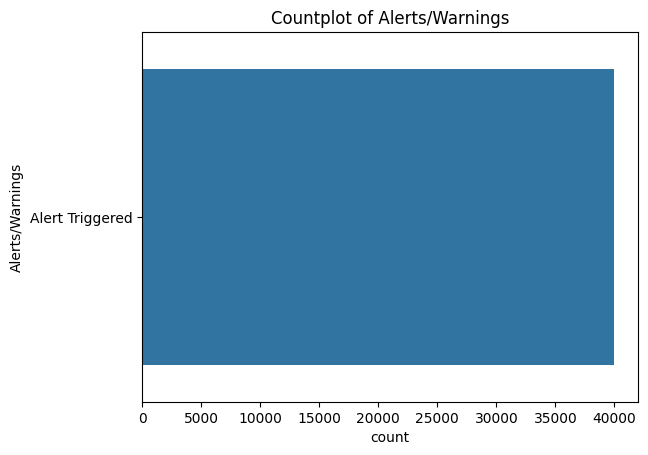

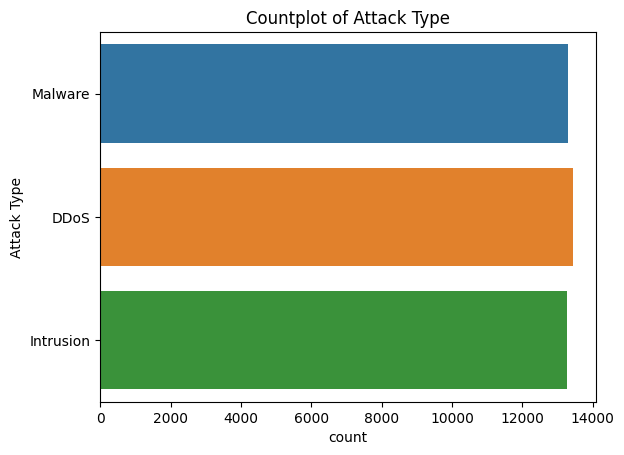

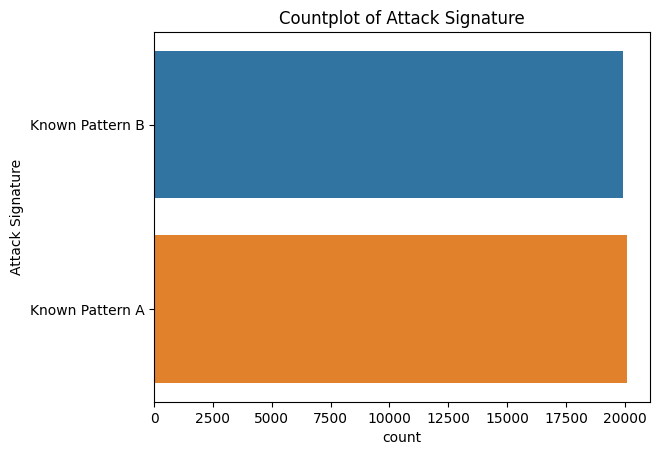

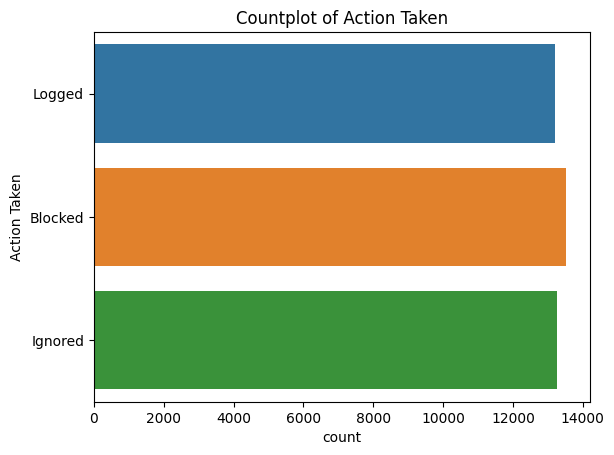

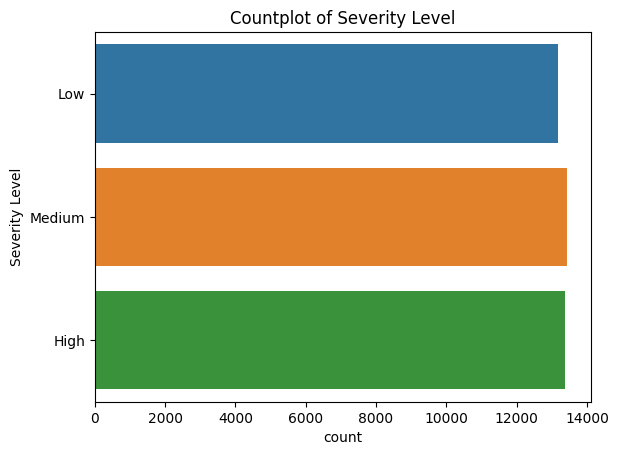

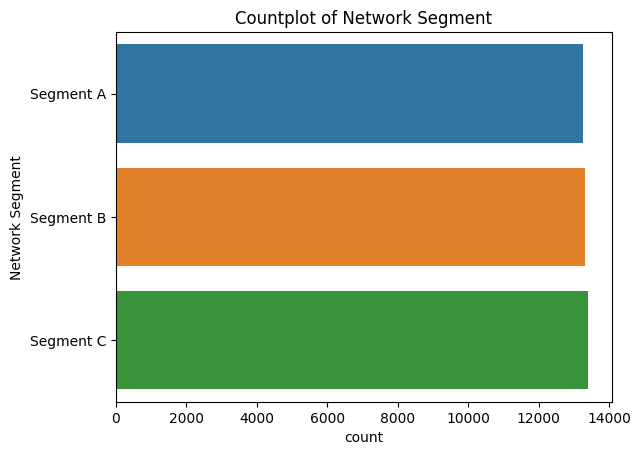

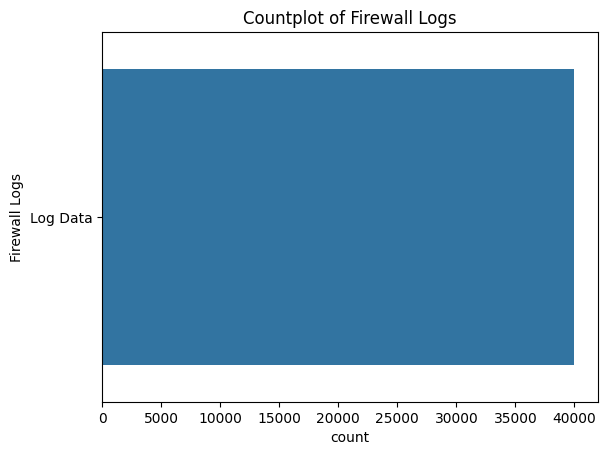

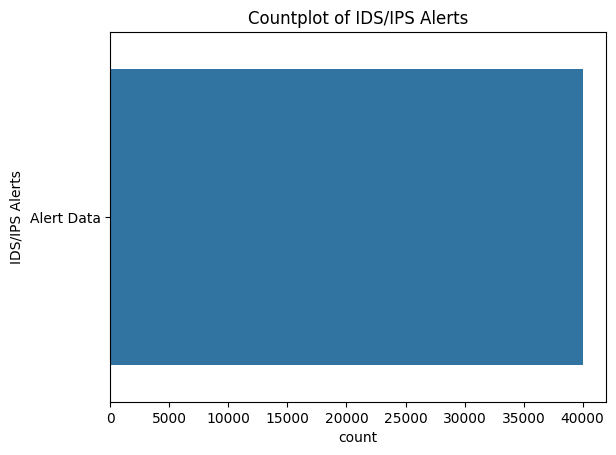

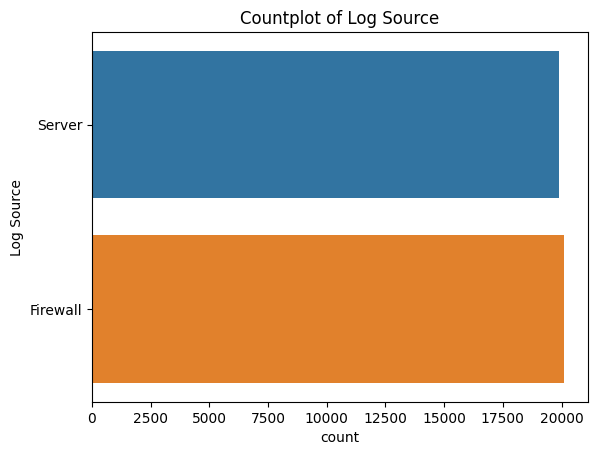

In [21]:
for col in cat_cols:
    sns.countplot(y=df[col])
    plt.title(f"Countplot of {col}")
    plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

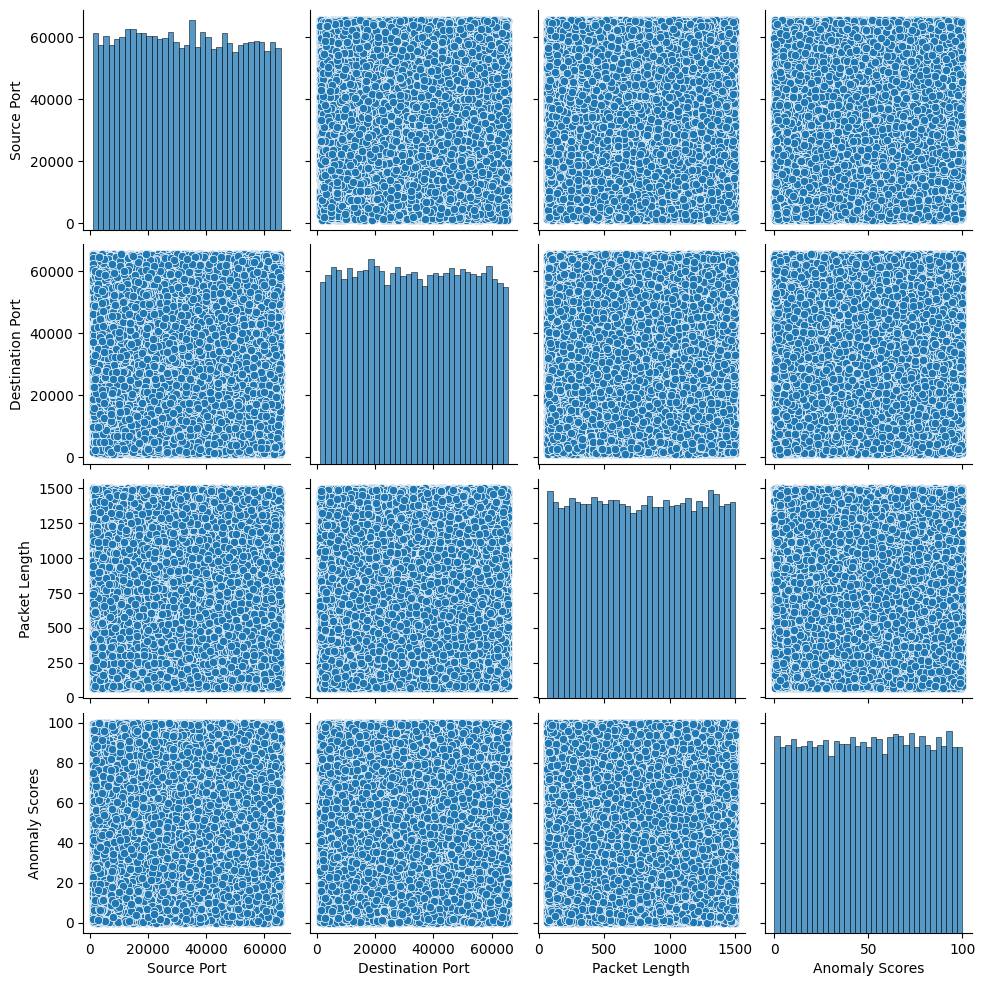

In [22]:
sns.pairplot(df)
plt.show()
